## Quantium Analytics Customer Analysis

#### This Project is aimed at understanding customer behaviour through a year's transaction and providing recomendations from the same to the Chip segment manager. This will aid the company on an enterprise level to understand the the customers to be targeted for increased sales.

In [1]:
# Importing the necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
sns.set() # Setting seaborn as default style
    

In [2]:
# Loading the data sets from google drive.
path="https://docs.google.com/spreadsheets/d/e/2PACX-1vS4MqswS0ISKSntl85QN9aOo7r_6tRiftdPCakXYfc2WZ4bH1Zad0DANYL6BaNq1MyPG8Yq4nN7q8xi/pub?output=csv"
transact_df=pd.read_csv(path)
transact_df.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
# Loading transctional data from google drive
path_1="https://docs.google.com/spreadsheets/d/e/2PACX-1vT6Tr4sh8b1XcXn477IEMWVfsA-v4qF3M-BNF9s4Wka7pMru71W4PTaTuhQ4K6chQ/pub?output=csv"
customer_df=pd.read_csv(path_1)
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Cleaning Transactional data

In [4]:
def dataset_info(df):
    '''This will mainly output the head, the tail and the shape of the dataset'''
    print(df.head())
    print(df.tail())
    print(f"The transactional dataset has {transact_df.shape[0]} rows and {transact_df.shape[1]} columns")

In [5]:
# Properties of my dataset.
dataset_info(transact_df)

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream
       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream
The transactional dataset has 72637 rows and 3 columns


In [6]:
# Checking for missing values
missing_val=transact_df.isnull().any()
missing_val
# The dataset is clean. There are no missing values in the dataset

LYLTY_CARD_NBR      False
LIFESTAGE           False
PREMIUM_CUSTOMER    False
dtype: bool

In [7]:
# Checking for duplicates
transact_df.duplicated().any()
# This is clean we dont have duplicated rows

False

In [8]:
#Anomally detection in categorical columns
for col in transact_df.iloc[:,1:]:
    value_df=transact_df[col].value_counts()
    print(value_df)
# No anomally or outlier detected in both lifestyle and premium columns

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64
Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


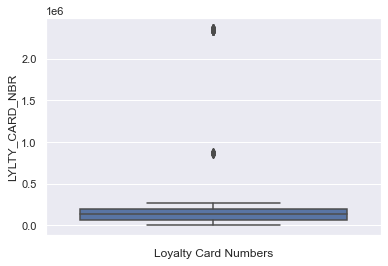

In [9]:
# Checking for outliers in Loyalty card numbers
fig=sns.boxplot(y=transact_df['LYLTY_CARD_NBR'])
fig.set_xlabel("Loyalty Card Numbers")
fig.set_axis_on()
# Some figures seem to be beyond the 3rd Quartile. They will be treated as inliers since loyalty card number can exted to whichever value.


### Cleaning Customer data

In [10]:
# Clear view
customer_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [11]:
customer_df.shape

(264836, 8)

In [12]:
#Properties of my dataset
dataset_info(customer_df)

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834 

In [13]:
# Dropping unnecessary columns
customer_df1=customer_df.drop(['DATE'],axis=1)
customer_df1.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
# Checking for missing values
customer_df1.isnull().sum()

STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [15]:
# Checking for duplicated values
customer_df1.duplicated().sum()
# We have duplicated values. We drop them to  avoid ambiguity
customer_df2=customer_df1.drop_duplicates()

In [16]:
# Rechecking for duplicates
customer_df2.duplicated().any()
# No duplicates detected.

False

Outlier detection in customer data

In [17]:
customer_df2['STORE_NBR'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

<AxesSubplot:title={'center':'Total Sales'}, ylabel='TOT_SALES'>

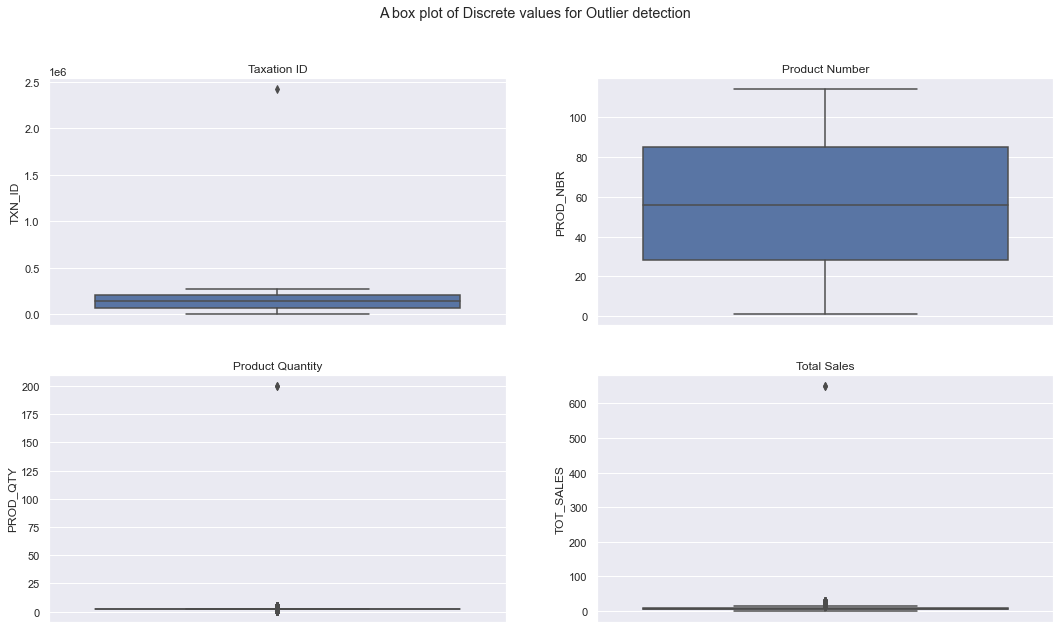

In [18]:
# Constructing subplots
fig, axes = plt.subplots(2,2,figsize=(18,10)) 
fig.suptitle("A box plot of Discrete values for Outlier detection")
# Setting first graph
axes[0,0].set_title("Taxation ID")
sns.boxplot(ax=axes[0,0],data=customer_df2,y="TXN_ID")
# Setting second graph
axes[0,1].set_title("Product Number")
sns.boxplot(ax=axes[0,1],data=customer_df2,y="PROD_NBR")
# Setting third graph
axes[1,0].set_title("Product Quantity")
sns.boxplot(ax=axes[1,0],data=customer_df2,y="PROD_QTY")
# Setting fourth graph
axes[1,1].set_title("Total Sales")
sns.boxplot(ax=axes[1,1],data=customer_df2,y="TOT_SALES")
# There are outliers present in Taxation ID, Product quantity and Total sales

#### Outliers detected in several columns
##### Outlier removal proceedures

In [19]:
# Outlier removal in numerical columns
df_cols_outliers=customer_df2[["STORE_NBR","LYLTY_CARD_NBR","TXN_ID","PROD_NBR","PROD_QTY","TOT_SALES"]]
df_cols_outliers.head()
# Quantile calculations
def outlier_detection(df,column):
    # Getting the first and third quantile    
    Q_1=df[column].quantile(0.25)
    Q_3=df[column].quantile(0.75)
    # Calculating the IQR
    IQR=Q_3-Q_1
    # Getting the fences
    inner_fence=1.5*IQR
    outer_fence=3.0*IQR
    # Getting the lower limits
    lower_inner_fence=Q_1-inner_fence
    lower_outer_fence=Q_1-outer_fence
    # Upper limits
    upper_inner_fence=Q_3+inner_fence
    upper_outer_fence=Q_3+outer_fence
    # Creating empty list to populate possible and probable outlers 
    probable_outlier_indexes=[]
    possible_outlier_indexes=[]
    # Populating the probable outliers
    for index,x in enumerate(df[column]):
        if x<=lower_outer_fence or x>=upper_outer_fence:
            probable_outlier_indexes.append(index)
    for index,x in enumerate(df[column]):
        if x<=lower_inner_fence or x>=upper_inner_fence:
            possible_outlier_indexes.append(index)
    return probable_outlier_indexes,possible_outlier_indexes       

In [20]:
# Testing the function
probable_outliers_tax,possible_outliers_tax=outlier_detection(customer_df2,"TXN_ID")
print(probable_outliers_tax)
print(possible_outliers_tax)

[15726]
[15726]


In [21]:
# Testing the function on product quantity.
probable_outliers_prod_qty,possible_outliers_prod_qty=outlier_detection(customer_df2,"PROD_QTY")
# This will pick out alot of ouliers because of the small IQR this this method is not suitable for this column.

#### Due to highly skewed columns, there's need to use the log-IQ method where each value is converted to its log before calculating the fences. In order to avoid a log 0 , will use x^=log(x+1)

In [22]:
# Esperiment with Product Quantity column
customer_df2['TXN_ID_man']=customer_df2["TXN_ID"]
tax_log= np.log(customer_df2['TXN_ID_man'])
# Another column with logarithmic values
customer_df2['Tax_Log']=tax_log

probable_outliers_prod_qty,possible_outliers_prod_qty=outlier_detection(customer_df2,"Tax_Log")


<ipython-input-22-b6e12a9f98c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df2['TXN_ID_man']=customer_df2["TXN_ID"]
<ipython-input-22-b6e12a9f98c4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df2['Tax_Log']=tax_log


In [23]:
customer_df2.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_ID_man,Tax_Log
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,0.000000
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,348,5.852202
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,383,5.948035
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,974,6.881411
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1038,6.945051


#### Still yielding alot of values thus will treat all the outliers as inliers. as they are valid to be used in the dataset.

In [24]:
customer_df2.head()


,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,TXN_ID_man,Tax_Log
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,1,0.000000
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,348,5.852202
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,383,5.948035
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,974,6.881411
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,1038,6.945051


In [25]:
customer_clean=customer_df2.drop(["TXN_ID_man","Tax_Log"], axis=1)
customer_clean.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


#### Merging the two datasets

In [26]:
df_all=pd.merge(transact_df,customer_clean,how="outer",on='LYLTY_CARD_NBR')
df_all.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9


In [27]:
df_all.shape
# Data Validation
df_all.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
dtype: int64

In [28]:
# There are no duplicated values
df_all.duplicated().any()

False

## Exploratory Data Analysis

In [29]:
# Reviewing my dataset
df_all.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9


What were the total sales accross the different lifestages?

In [49]:
# Function to print the sorted tables and the charts
def total_sales(df,col1,col2):
    df_1=df.groupby([col1])[col2].sum().reset_index()
    print(df_1.sort_values(by=col2,ascending=False))
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(x=col1,y=col2,data=df_1,ax=ax,order=df_1[col1])
    plt.title(f"{col1} Plot against sum of {col2}")
    plt.xticks(rotation=70)

What are the lifestage contributions to the total sales ?

                LIFESTAGE  TOT_SALES
3   OLDER SINGLES/COUPLES  402420.75
4                RETIREES  366470.90
2          OLDER FAMILIES  353767.20
5          YOUNG FAMILIES  316160.10
6   YOUNG SINGLES/COUPLES  260405.30
0  MIDAGE SINGLES/COUPLES  184751.30
1            NEW FAMILIES   50433.45


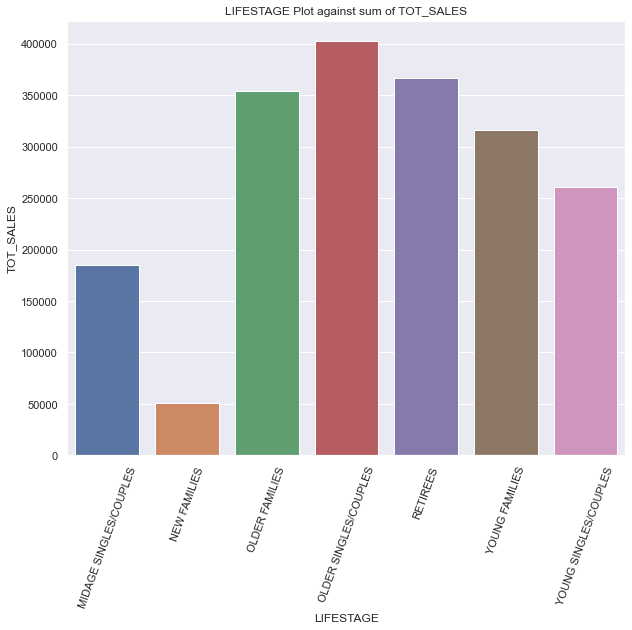

In [50]:
total_sales(df_all,"LIFESTAGE","TOT_SALES")

Older singles and couples' total  sales were the maximum followed closely by retirees and older families.
The least purchases were from New families. Their purchasing behavior is minimal.

In [51]:
# Why is are the new family purchases few?
# Checking their valuecount
df_all["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     54478
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

#### Since sum might be greatly influenced by value count. We need to understand the mean data gennerated by each lifestage type.

In [66]:
# Function to print the sorted tables and the charts
def mean_sales(df,col1,col2):
    df_1=df.groupby([col1])[col2].mean().reset_index()
    print(df_1.sort_values(by=col2,ascending=False))
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(x=col1,y=col2,data=df_1,ax=ax,order=df_1[col1])
    plt.title(f"{col1} Plot against mean {col2}")
    plt.xticks(rotation=70)

                LIFESTAGE  TOT_SALES
3   OLDER SINGLES/COUPLES   7.386849
4                RETIREES   7.364325
0  MIDAGE SINGLES/COUPLES   7.357678
1            NEW FAMILIES   7.289124
2          OLDER FAMILIES   7.279760
5          YOUNG FAMILIES   7.252709
6   YOUNG SINGLES/COUPLES   7.158515


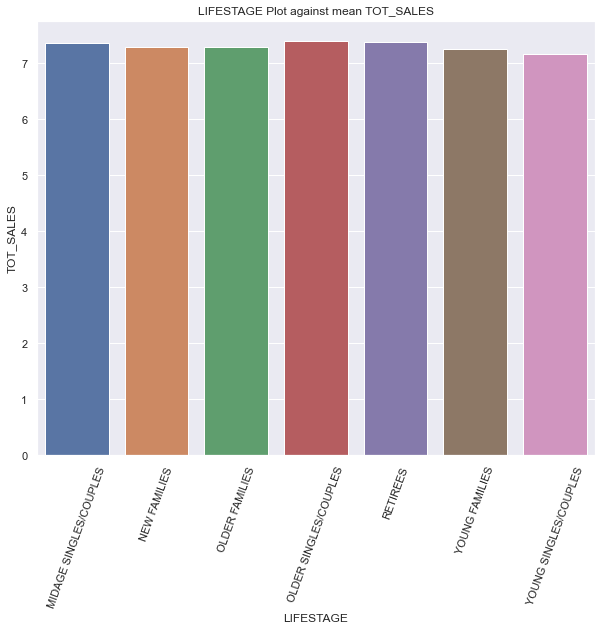

In [67]:
#Mean sales per group
mean_sales(df_all,"LIFESTAGE","TOT_SALES")

What kind of customers generated sales?

  PREMIUM_CUSTOMER  TOT_SALES
1       Mainstream  750744.50
0           Budget  676211.55
2          Premium  507452.95


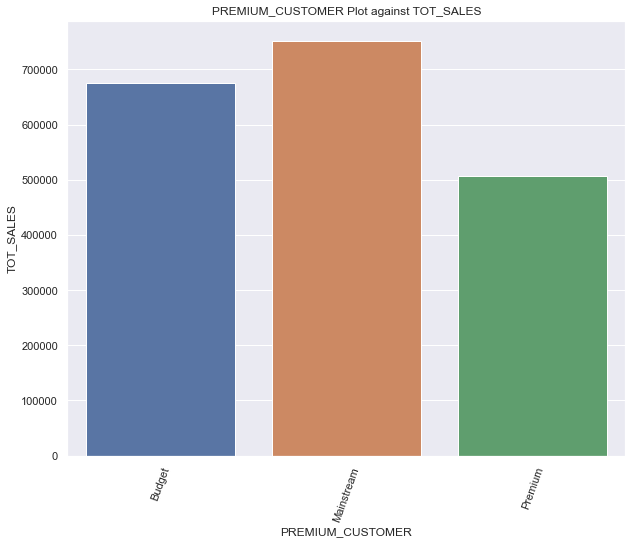

In [33]:
total_sales(df_all,"PREMIUM_CUSTOMER","TOT_SALES")

Mainstream customers generated most sales.

In [34]:
# Investigating the reason for this
df_all["PREMIUM_CUSTOMER"].value_counts()

Mainstream    101988
Budget         93157
Premium        69690
Name: PREMIUM_CUSTOMER, dtype: int64

  PREMIUM_CUSTOMER  TOT_SALES
1       Mainstream   7.361106
2          Premium   7.281575
0           Budget   7.258838


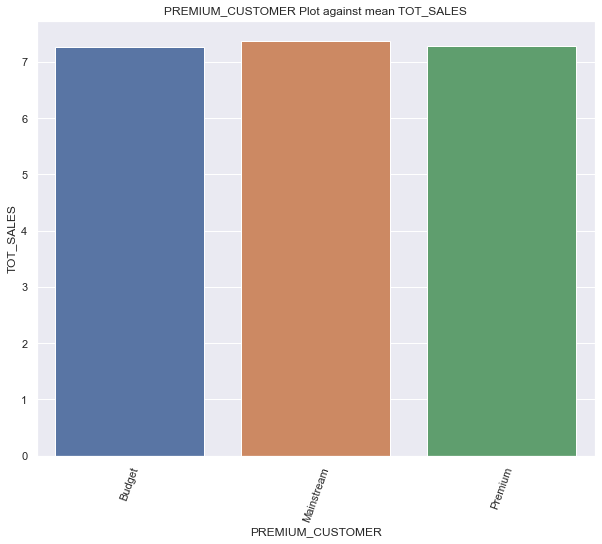

In [68]:
# Rechecking mean of sales to validate the findings
mean_sales(df_all,"PREMIUM_CUSTOMER","TOT_SALES")

This is clear evidence that the findings could be skewed by the value counts thus the order of customer value is Mainstream,Premium and Budget

##### Which customer scored the highest in sales

In [35]:
# Getting the maximum sale
df_all_max=max(df_all["TOT_SALES"])
df_all_max
# Characterstics of the customer with the maximum sale.
df_all.loc[df_all['TOT_SALES'] == df_all_max]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221624,226000,OLDER FAMILIES,Premium,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221625,226000,OLDER FAMILIES,Premium,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [71]:
# Getting the maximum sale
df_all_min=min(df_all["TOT_SALES"])
df_all_min
# Characterstics of the customer with the maximum sale.
Minimum_sales=df_all.loc[df_all['TOT_SALES'] == df_all_min]
Minimum_sales.shape

(354, 9)

In [37]:
Minimum_sales.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
139,1124,RETIREES,Mainstream,1,148,35,Woolworths Mild Salsa 300g,1,1.5
163,1150,YOUNG SINGLES/COUPLES,Budget,1,173,35,Woolworths Mild Salsa 300g,1,1.5
413,1370,NEW FAMILIES,Budget,1,428,35,Woolworths Mild Salsa 300g,1,1.5
525,1460,YOUNG SINGLES/COUPLES,Premium,1,541,35,Woolworths Mild Salsa 300g,1,1.5
861,2272,YOUNG SINGLES/COUPLES,Budget,2,882,76,Woolworths Medium Salsa 300g,1,1.5


In [38]:
Minimum_sales["LIFESTAGE"].value_counts()

YOUNG SINGLES/COUPLES     96
OLDER SINGLES/COUPLES     66
RETIREES                  59
OLDER FAMILIES            43
MIDAGE SINGLES/COUPLES    39
YOUNG FAMILIES            37
NEW FAMILIES              14
Name: LIFESTAGE, dtype: int64

In [39]:
# The count of product name with minimum sales
Minimum_sales["PROD_NAME"].value_counts()

Woolworths Mild     Salsa 300g    182
Woolworths Medium   Salsa 300g    172
Name: PROD_NAME, dtype: int64

In [40]:
# Type of customers with the least sales
Minimum_sales["PREMIUM_CUSTOMER"].value_counts()

Budget        136
Mainstream    122
Premium        96
Name: PREMIUM_CUSTOMER, dtype: int64

## Bivariate analysis

(array([0, 1, 2]),
 [Text(0, 0, 'Premium'), Text(1, 0, 'Mainstream'), Text(2, 0, 'Budget')])

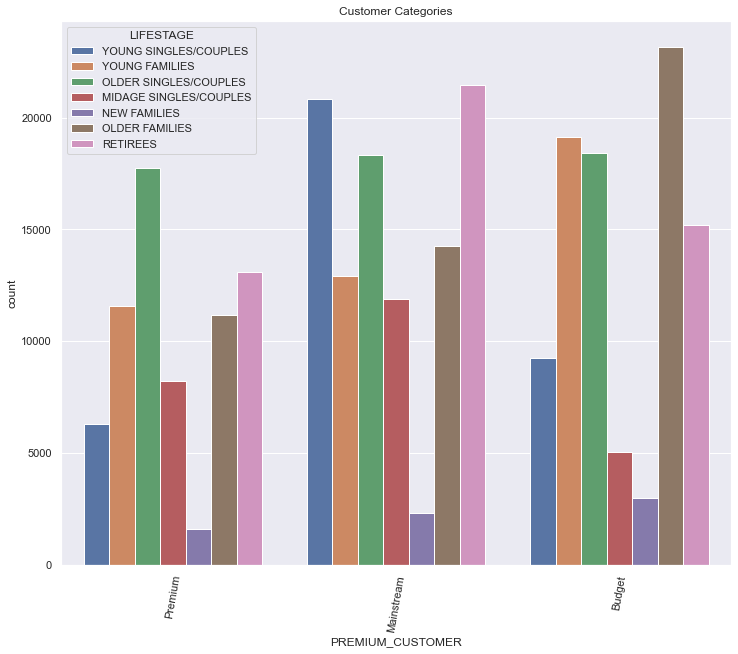

In [41]:
# Which categories of customers do life stages belong
fig, ax = plt.subplots(figsize=(12,10))
sns.countplot(x="PREMIUM_CUSTOMER",hue="LIFESTAGE",data=df_all,ax=ax)
plt.title("Customer Categories")
plt.xticks(rotation=80)

Interms of quantity, who consumes the most?

                LIFESTAGE  PROD_QTY
3   OLDER SINGLES/COUPLES    104201
2          OLDER FAMILIES     94992
4                RETIREES     94166
5          YOUNG FAMILIES     84561
6   YOUNG SINGLES/COUPLES     66634
0  MIDAGE SINGLES/COUPLES     47721
1            NEW FAMILIES     12847


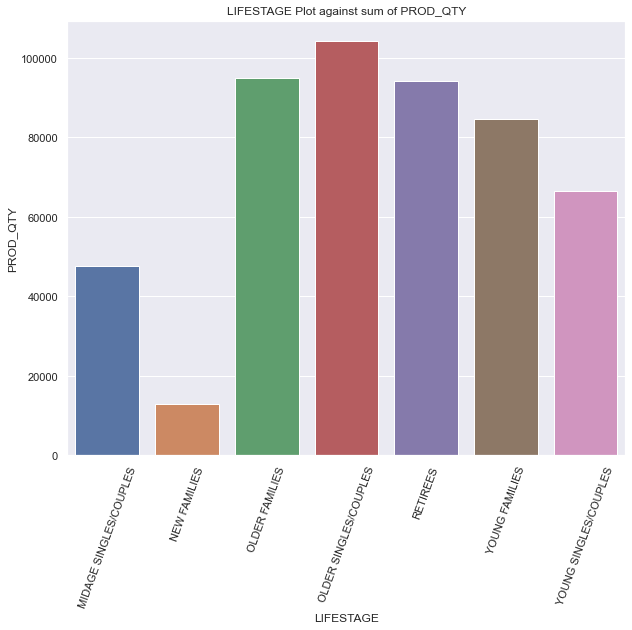

In [79]:
total_sales(df_all,"LIFESTAGE","PROD_QTY")

  PREMIUM_CUSTOMER  PROD_QTY
1       Mainstream    193965
0           Budget    177898
2          Premium    133259


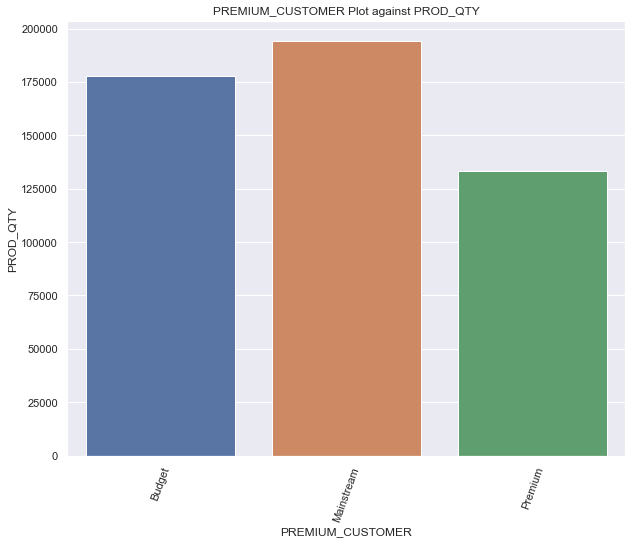

In [42]:
total_sales(df_all,"PREMIUM_CUSTOMER","PROD_QTY")

Main Stream Customers consume the largest products

#### What is the relationship between product quantity and total sales

In [78]:
# Correlationn between product quantity and total sales
from scipy.stats import pearsonr,skew
correlation_df=pearsonr(df_all["PROD_QTY"],df_all["TOT_SALES"])
print(correlation_df)
print(skew(df_all["PROD_QTY"]))
print(skew(df_all["TOT_SALES"]))
# Theres a prety strong correlation between the total sales and the product quantity. 
# This could only mean large products had more sales as compared to small products. 
# Not really a matter of causation but of correlation

(0.7153075743496142, 0.0)
220.10143820409928
68.56917847908626


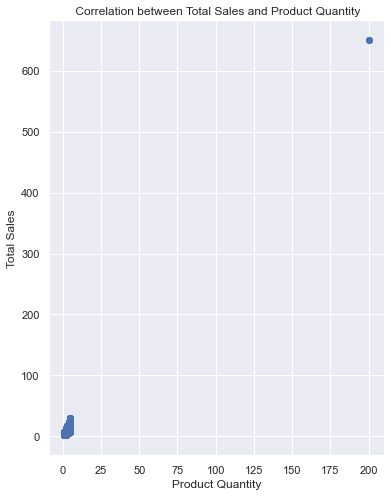

In [70]:
# Correlation diagram
plt.figure(figsize=(6,8))
plt.scatter(df_all["PROD_QTY"],df_all["TOT_SALES"])
plt.title(" Correlation between Total Sales and Product Quantity")
plt.ylabel("Total Sales")
plt.xlabel("Product Quantity")
plt.show()
# The data is pretty skewed

### From our analysis it is important to understand who is our most valued customer and who needs more persiation.
1. Where are our highest sales coming from?
Older singles and couples generated maximum sales when the sum and the average sales accross all lifestage types were assesed. This could be caused by the large sample space from that patrticular group. The large sample space collected also indicated the type of customers that are served at this shop most of the time.
Main stream customers are also large revenue producers as their mean and total sales reflect the same. It is important to not that when looking at the mean, premium customers have higher sales as compared to budget customer . This was not the result when we looked at sum of sales accross customer types.
2. The purchase with the highest sale came from a premium customer of the older family stage (Its interesting how valuable this combination is). The Dorito Corn Chp Supreme 380g was the product bought and the product quantity was 200. 
3. Minimum sales had common characteristics ie. Most of the minimum sales came from Young Singles/Couples, most of them were budget customers and the product name recording minimum sales was Woolworths Mild Salsa 300g & Woolworths Medium Salsa 300g.
4. Theres a prety strong positive correlation between the total sales and the product quantity. The data is pretty skewed also towards the left.
5. Older singles/Couples consume the largest in product quantity followed closely by older families and retirees. New families on the other hand dont consume much(their product quantity consumption is the least). Mainstream customers have been seen to consume the largest product quantities.
